In [9]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD2 import PD2
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

PD2 Fridge and Electronics Values:

In [32]:
printing = True 
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

---------------- ABSORBER PARAMETERS ----------------
Absorber lscat  0.001948849104859335
Absorber SA_face 0.00456036731187748
Absorber SA 0.009360123983958501
Absorber mass 0.01062109546936265
------------------------------------------------



Standard TES width they say we can do at Stanford: 2.5um
At TAMU can do TES width: 3um 

PD2 True Values:

In [33]:
tes_l = 140e-6 # same as matlab
tes_w = 3.5e-6 # this is what we want, Fabrication is questionable  
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
l_overlap = 10e-6 # same as matlab 
n_fin = 6
l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
n= 89e-3

In [34]:
sigma_rn = []
v_tot = []
tau_pAbsorb = []
fSA_qpAbsorb = []
wal_overlap = []
w_fincon = []

tes = TES(tes_l, tes_w, l_overlap, n_fin, sigma, T_eq, n, 0.45, tungsten ,printing)
qet = QET( l_fin, h_fin, tes)
det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 2)
e_res = simulate_noise(det)
print(e_res)
sigma_rn.append(e_res)
v_tot.append(tes._tot_volume)
wal_overlap.append(tes._vol_WAl_overlap)
w_fincon.append(tes._vol_WFinCon)
tau_pAbsorb.append(det._t_pabsb)
fSA_qpAbsorb.append(det._fSA_qpabsorb)

---------------- TES PARAMETERS ----------------
sigma 220000000.0
wTc 0.0001212666209673604
Tc 0.04
rho 9.599999999999999e-08
t 4e-08
l 0.00014
w 3.5e-06
foverlap 0.8953488372093023
res1tes 95.99999999999997
n_fin 6
vol1TES 1.9599999999999997e-17
vol1 4.47289e-17
nTES 1079
tot_volume 4.8262483100000005e-14
K 1.0617746282000002e-05 
volFinCon 4.8599999999999996e-18
WAlOverlap 4.633800000000001e-17
veff_WFinCon 0.88
veff_WAloverlap 0.45
Rn 0.08897126969416123
Ro 0.040037071362372556
fOp 0.45
Ro 0.040037071362372556
L 0
------------------------------------------------

---------------- QET PARAMETERS ----------------
ePQP 0.52
lfin 0.0002
hfin 6e-07
loverlap 1e-05
ld 0.0003402
la 0.00029508196721311476 
Afin_empty 1.11e-08
Afin 1.585460032938488e-07
------------------------------------------------

---------------- DETECTOR PARAMETERS ----------------
nP 1
SAactive 0.00017107113755406286
lcell 0.0018939623022059243
SApassive 1.944776451295413e-05
fSA_QPabsb 0.02035431393788487
ePcollect 

In [24]:
Rn = 100e-3 # setting normal Resistance to 100 mOhms...
n_fins = [2,3,4,5,6,7,8]
sigma_nfin = []
v_tot_nfin = []
wal_overlap_nfin = []
w_fincon_nfin = []
tau_pAbsorb_nfin = []
fSA_qpAbsorb_nfin = []
for n in n_fins:
    tes = TES(tes_l, tes_w, l_overlap, n, sigma, T_eq, Rn, 0.45,tungsten ,printing)
    qet = QET( l_fin, h_fin, tes)
    det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
    e_res = simulate_noise(det)
    sigma_nfin.append(e_res)
    v_tot_nfin.append(tes._tot_volume)
    wal_overlap_nfin.append(tes._vol_WAl_overlap)
    w_fincon_nfin.append(tes._vol_WFinCon)
    tau_pAbsorb_nfin.append(det._t_pabsb)
    fSA_qpAbsorb_nfin.append(det._fSA_qpabsorb)

---------------- TES PARAMETERS ----------------
sigma 220000000.0
wTc 0.0001212666209673604
Tc 0.04
rho 9.599999999999999e-08
t 4e-08
l 0.00014
w 3.5e-06
foverlap 0.9651162790697674
res1tes 95.99999999999997
n_fin 2
vol1TES 1.9599999999999997e-17
vol1 2.79763e-17
nTES 960
tot_volume 2.6857248000000002e-14
K 5.90859456e-06 
volFinCon 1.62e-18
WAlOverlap 1.5446000000000002e-17
veff_WFinCon 0.88
veff_WAloverlap 0.45
Rn 0.09999999999999996
Ro 0.044999999999999984
fOp 0.45
Ro 0.044999999999999984
L 0
------------------------------------------------

---------------- QET PARAMETERS ----------------
ePQP 0.52
lfin 0.0002
hfin 6e-07
loverlap 1e-05
ld 0.0003402
la 0.00029508196721311476 
Afin_empty 5.099999999999999e-09
Afin 1.6454600329384884e-07
------------------------------------------------

---------------- DETECTOR PARAMETERS ----------------
nP 1
SAactive 0.00015796416316209489
lcell 0.002007920142094893
SApassive 1.8596706623932276e-05
fSA_QPabsb 0.01886309092578468
ePcollect 0.894672

---------- Response Parameters------------
Gep 1.0946295340292329e-10
LG  70.2748065674573
C 4.084330778226887e-13
Io 4.341116580376897e-06
Lt 5e-08
Rl 0.011
Ro 0.044999999999999984
beta  0
-----------------------------------------

---------------- NOISE PARAMETERS ----------------
--------------------------------------------------

>>>>>>>>>>>>>>>>>>>>>> RESOLUTION IS 2.017501439280873
---------------- TES PARAMETERS ----------------
sigma 220000000.0
wTc 0.0001212666209673604
Tc 0.04
rho 9.599999999999999e-08
t 4e-08
l 0.00014
w 3.5e-06
foverlap 0.8953488372093023
res1tes 95.99999999999997
n_fin 6
vol1TES 1.9599999999999997e-17
vol1 4.47289e-17
nTES 960
tot_volume 4.2939744e-14
K 9.44674368e-06 
volFinCon 4.8599999999999996e-18
WAlOverlap 4.633800000000001e-17
veff_WFinCon 0.88
veff_WAloverlap 0.45
Rn 0.09999999999999996
Ro 0.044999999999999984
fOp 0.45
Ro 0.044999999999999984
L 0
------------------------------------------------

---------------- QET PARAMETERS ----------------
ePQP

<IPython.core.display.Javascript object>


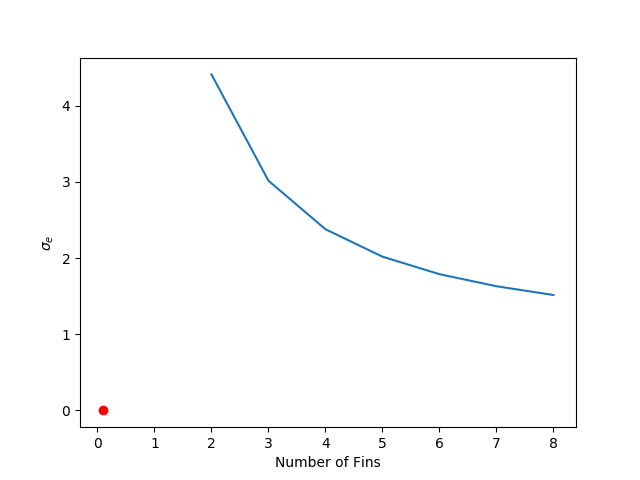

In [26]:
plt.plot(n_fins, sigma_nfin)
#plt.plot(0.089, 1.260056e-16, 'ro')
plt.ylabel("$\sigma_{e}$")
plt.xlabel("Number of Fins")
plt.show()

In [ ]:
plt.plot(res_n, wal_overlap)
plt.plot(0.089, 1.260056e-16, 'ro')
plt.ylabel("W/Al Overlap")
plt.xlabel("$R_{n}$ [Ohms]")
plt.show()

In [ ]:
plt.plot(res_n, w_fincon)
plt.plot(0.089, 1.96952e-17, 'ro')
plt.ylabel("W Fin Connector")
plt.xlabel("$R_{n}$ [Ohms]")
plt.show()

In [ ]:
plt.plot(res_n, fSA_qpAbsorb)
plt.plot(0.089, 0.021868, 'ro')
plt.ylabel("Percentage Surface Area Absorbing QP")
plt.xlabel("$R_{n}$ [Ohms]")
plt.show()

In [ ]:
plt.plot(res_n, sigma_rn)
plt.plot(0.089, 1.4, 'ro')
plt.ylabel("Energy Resolution [eV]")
plt.xlabel("$R_{n}$ [Ohms]")
plt.show()

In [ ]:
plt.plot(res_n, v_tot)
plt.plot(0.089, 9.6536e-14, 'ro')
plt.ylabel("TES Total Volume")
plt.xlabel("$R_{n}$ [Ohms]")
plt.show()

In [ ]:
tau_pa_ms = []
for t in tau_pAbsorb:
    tau_pa_ms.append(t*10**6)
plt.plot(res_n, tau_pa_ms)
plt.plot(0.089, 20, 'ro') 
plt.ylabel(r"$\tau_{pAbs}$ [ms]")
plt.xlabel("$R_{n}$ [Ohms]")
plt.show()